# Análisis de Baterías

Este análisis se realiza en la inspiración de poder estimar parámetros de la batería, en este caso el estado de salud de la misma

In [112]:
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos, transformar_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


## Recolección de datos

Los datos son cargados en un DataFrame de Pandas, donde columnas corresponden a series de tiempo con la información necesaria de cada salto, además de contener el ciclo al que pertenencen.

In [113]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
documento_2 = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW4.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
comentario_final = ['charge (after random walk discharge)']
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)
t_2, v_2, c_2, temp_2, T_2 = carga_de_datos(documento_2, comentarios, comentario_final, nofinal=False)

carga de datos de bateria RW5.mat
tiempo len: 743
voltage len: 743
current len: 743
temperatura len: 743
Tiempo absoluto len: 743
carga de datos de bateria RW4.mat
tiempo len: 728
voltage len: 728
current len: 728
temperatura len: 728
Tiempo absoluto len: 728


## Preparación de los datos

Los datos cargados son transformados para calzar en un dataframe con las series de tiempo en función del ciclo. Es decir, se carga un salto por fila del dataframe y el salto contiene la información del voltaje hasta la corriente no nula anterior, donde se almacenan de igual forma la temperatura y el voltaje de ese instante hasta que cambia la corriente a cero.

In [114]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t, v, c, temp, T)


saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}

df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])

df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df['temp_ini'] = [x[0] for x in df['temperatura']]

df.head()

ciclo 741     

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039
1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093
2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748
3,1,8200.072656,2.504,1.2520,"[3.733, 3.846, 3.854, 3.657, 3.652, 3.65, 3.64...","[1.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2...","[27.24822, 27.24822, 27.23267, 27.23267, 27.23...","[275785.35, 275785.36, 275785.81, 275785.85, 2...",27.24822
4,1,10884.859898,0.504,0.2520,"[3.543, 3.731, 3.747, 3.708, 3.711, 3.715, 3.7...","[2.5, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.07...","[276085.81, 276085.82, 276086.28, 276086.33, 2...",28.07212


In [115]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t_2, v_2, c_2, temp_2, T_2)

saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}
df_2 = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])
df_2['voltaje'] = [x for x in arr_voltaje_salto]
df_2['corriente'] = [x for x in arr_corriente_salto]
df_2['temperatura'] = [x for x in arr_temperatura_salto]
df_2['tiempo'] = [x for x in arr_tiempo_salto]
df_2['temp_ini'] = [x[0] for x in df_2['temperatura']]

df_2.head()

ciclo 726     

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,1,0.614707,4.002,2.0010,"[4.199, 4.199, 3.84, 3.814, 3.807, 3.8, 3.795,...","[0.0, 0.0, 4.002, 4.0, 4.0, 4.0, 4.001, 4.001,...","[21.64345, 21.64345, 21.64345, 21.64345, 21.64...","[281556.4, 281556.56000000006, 281556.6, 28155...",21.64345
1,1,4268.008336,0.505,0.2525,"[3.514, 3.809, 3.836, 3.799, 3.81, 3.819, 3.82...","[4.0, 0.0, 0.0, 0.505, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.38382, 28.38382, 28.38382, 28.38382, 28.38...","[281856.56000000006, 281856.56999999995, 28185...",28.38382
2,1,4858.765507,3.001,1.5005,"[3.953, 3.989, 3.991, 3.762, 3.752, 3.747, 3.7...","[0.501, 0.0, 0.0, 3.001, 3.0, 3.001, 3.0, 3.0,...","[27.29416, 27.29416, 27.29416, 27.29416, 27.29...","[282156.74, 282156.75, 282156.93, 282156.97, 2...",27.29416
3,1,8106.905952,2.007,1.0035,"[3.551, 3.769, 3.785, 3.633, 3.633, 3.635, 3.6...","[3.0, 0.0, 0.0, 2.007, 2.001, 2.001, 2.0, 2.0,...","[29.19329, 29.19329, 29.19329, 29.19329, 29.19...","[282456.93, 282456.94, 282457.11, 282457.14999...",29.19329
4,1,10293.294611,2.007,1.0035,"[3.623, 3.767, 3.776, 3.625, 3.624, 3.624, 3.6...","[2.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[29.16216, 29.16216, 29.16216, 29.16216, 29.16...","[282757.11, 282757.12, 282757.29000000004, 282...",29.16216


## Visualización de datos

Ahora se plotean los histogramas para verificar la correctitud de los datos tomados

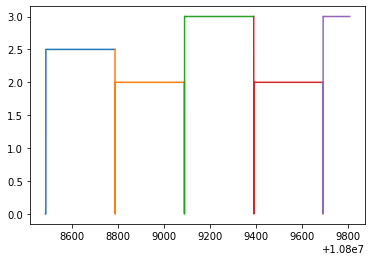

In [116]:
idx = 600
tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
corrientos = df.loc[(df['ciclo'] == idx), 'corriente'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, corrientos[i])#, plt.show()#, plt.show()
plt.show()

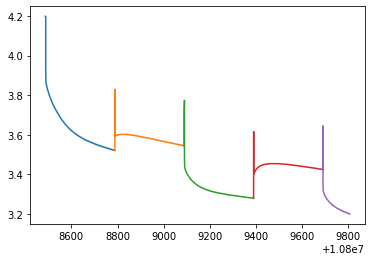

In [117]:
tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
voltajos = df.loc[(df['ciclo'] == idx), 'voltaje'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, voltajos[i])#, plt.show()#, plt.show()
plt.show()

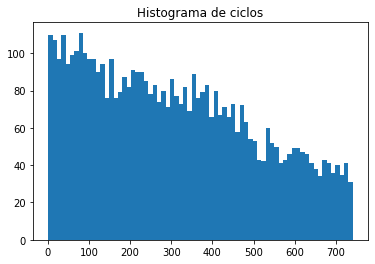

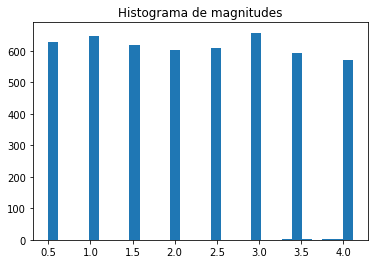

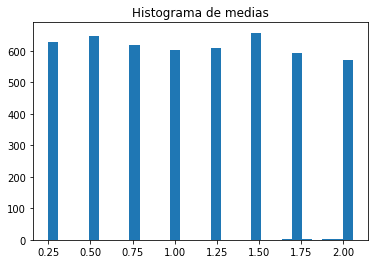

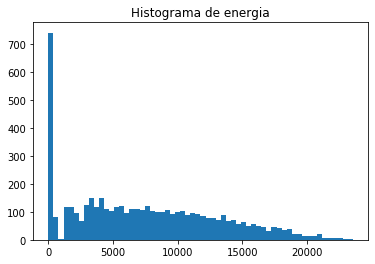

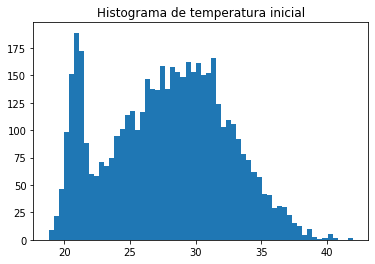

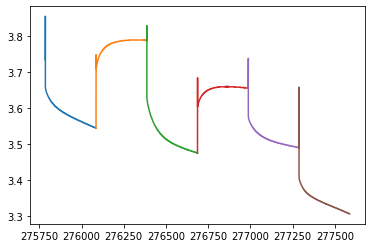

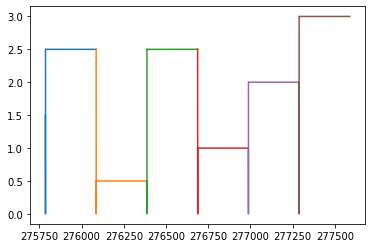

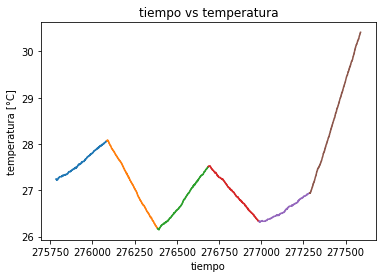

In [118]:
# analisis estadistico de los ciclos: ploteo de histogramas
plt.hist(df['ciclo'], bins=70), plt.title('Histograma de ciclos'), plt.show()
plt.hist(df['magnitud'], bins=30), plt.title('Histograma de magnitudes'), plt.show()
plt.hist(df['media'], bins=30), plt.title('Histograma de medias'), plt.show()
plt.hist(df['energia'], bins=60), plt.title('Histograma de energia'), plt.show()
plt.hist(df['temp_ini'], bins=60), plt.title('Histograma de temperatura inicial'), plt.show()

for i in range(3,9):
    plt.plot(df['tiempo'][i], df['voltaje'][i])
plt.show()

for i in range(3,9):
    plt.plot(df['tiempo'][i], df['corriente'][i])
plt.show()

for i in range(3,9):
    plt.plot(df['tiempo'][i], df['temperatura'][i])
    plt.title('tiempo vs temperatura')
    plt.xlabel('tiempo')
    plt.ylabel('temperatura [°C]')
plt.show()


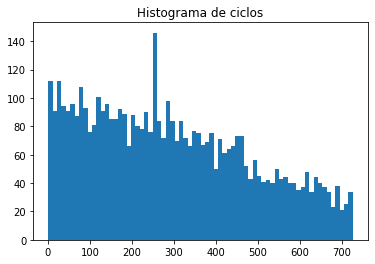

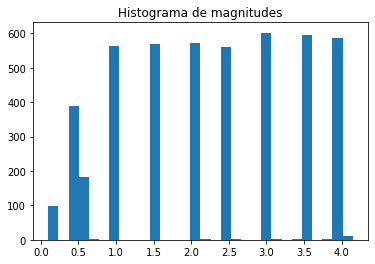

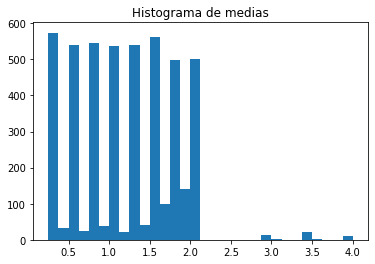

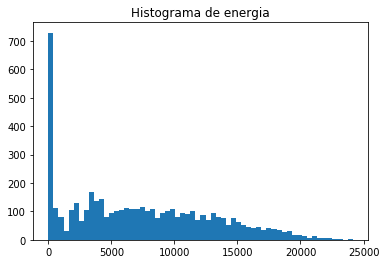

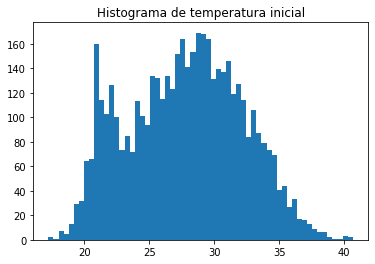

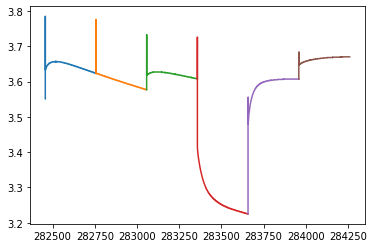

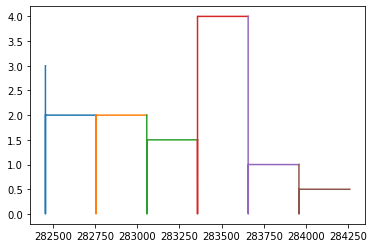

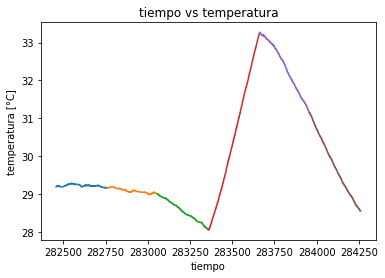

In [119]:
# analisis estadistico de los ciclos: ploteo de histogramas
plt.hist(df_2['ciclo'], bins=70), plt.title('Histograma de ciclos'), plt.show()
plt.hist(df_2['magnitud'], bins=30), plt.title('Histograma de magnitudes'), plt.show()
plt.hist(df_2['media'], bins=30), plt.title('Histograma de medias'), plt.show()
plt.hist(df_2['energia'], bins=60), plt.title('Histograma de energia'), plt.show()
plt.hist(df_2['temp_ini'], bins=60), plt.title('Histograma de temperatura inicial'), plt.show()

for i in range(3,9):
    plt.plot(df_2['tiempo'][i], df_2['voltaje'][i])
plt.show()

for i in range(3,9):
    plt.plot(df_2['tiempo'][i], df_2['corriente'][i])
plt.show()

for i in range(3,9):
    plt.plot(df_2['tiempo'][i], df_2['temperatura'][i])
    plt.title('tiempo vs temperatura')
    plt.xlabel('tiempo')
    plt.ylabel('temperatura [°C]')
plt.show()


## Extracción de características

A continuación, se hace la extracción de las características obtenidas desde el dataset. Además de mostrar su significado con un dibujo de las mismas.

In [120]:
from preparacion_entrenamiento import *
from extraccion_caracteristicas import *

In [121]:
# obtener features

#RW3
#df["ene_total"] = energia_total(df["energia"],df["ciclo"])

mag = Mg_rel(df['magnitud'])
df["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df["Mediana_rel"] = mag[1] #mediana relativa
df["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df["F1"] = [np.mean(x[:1]) for x in primera_derivada(df["voltaje"])] #primera derivada
df["F1"] = primera_derivada(df["voltaje"],df["tiempo"])
#df["F2"] = segunda_derivada(df["voltaje"]) #segunda derivada
df["F2"] = segunda_derivada(df["voltaje"],df["tiempo"]) 
df["F3"] = deltaT(df["temp_ini"],df["magnitud"])  #Diferencia de temperatura
df["F4"] = primera_derivada_RC(df["voltaje"])  # primera derivada efecto capacitivo
df["F5"] = segunda_derivada_RC(df["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F6"] = RC_test[0]  # circuito RC
df["F7"] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1) #Potencia instantanea
df["F8"] = np.round(df["F7"].values/df["Mag_rel"].values,3)
df["F9"] =  np.round(df["F7"].values/df["Mag_rel_abs"].values,3)
df['F10'] = diferencia_voltaje(df['voltaje'], df['corriente'])
df['F11'] = diferencia_voltaje2(df['voltaje'], df['corriente'])
#RW5
#df_2["ene_total"] = energia_total(df_2["energia"],df_2["ciclo"])

mag = Mg_rel(df_2['magnitud'])
df_2["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df_2["Mediana_rel"] = mag[1] #mediana relativa
df_2["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df_2["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df_2["F1"] = [np.mean(x[:1]) for x in primera_derivada(df_2["voltaje"])]
df_2["F1"] = primera_derivada(df_2["voltaje"],df_2["tiempo"])
#df_2["F2"] = segunda_derivada(df_2["voltaje"]) #segunda derivada
df_2["F2"] = segunda_derivada(df_2["voltaje"],df_2["tiempo"]) 
df_2["F3"] = deltaT(df_2["temp_ini"],df_2["magnitud"])
df_2["F4"] = primera_derivada_RC(df_2["voltaje"])  # primera derivada efecto capacitivo
df_2["F5"] = segunda_derivada_RC(df_2["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df_2["voltaje"],df_2["tiempo"],df_2["ciclo"])
df_2["F6"] = RC_test[0]  # circuito RC
df_2["F7"] = potencia_instantanea_salto(df_2['voltaje'], df_2['corriente'], limite=1) #Potencia instantanea
df_2["F8"] = np.round(df_2["F7"].values/df_2["Mag_rel"].values,3)
df_2["F9"] = np.round(df_2["F7"].values/df_2["Mag_rel_abs"].values,3)
df_2['F10'] = diferencia_voltaje(df_2['voltaje'], df_2['corriente'])
df_2['F11'] = diferencia_voltaje2(df_2['voltaje'], df_2['corriente'])
#Cambio de labels para etiquetar

sep = 10
df["clase"] = ChangeLabel(df['ciclo'],sep)
df_2["clase"] = ChangeLabel(df_2["ciclo"],sep)

#print(df["F7"].values/df["Mag_rel"].values)
#df.values[1393,:]


C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


In [122]:
print(df.shape)
print(len(np.unique(df.ciclo)))
df.head()

(4931, 25)
741


,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,Mag_rel,...,F3,F4,F5,F6,F7,F8,F9,F10,F11,clase
0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039,4.005,...,5.146165,0.000000,0.000000,0.00000,16.816995,4.199,4.199,-0.366,-0.366,1
1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093,-1.998,...,3.772068,0.000213,-0.000027,70.30368,7.710894,-3.859,3.859,0.171,-0.159,1
2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748,-0.504,...,0.124118,0.000107,-0.000034,26.98008,5.830137,-11.568,11.568,0.043,-0.116,1
3,1,8200.072656,2.504,1.2520,"[3.733, 3.846, 3.854, 3.657, 3.652, 3.65, 3.64...","[1.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2...","[27.24822, 27.24822, 27.23267, 27.23267, 27.23...","[275785.35, 275785.36, 275785.81, 275785.85, 2...",27.24822,1.001,...,0.446989,0.000000,0.000000,0.00000,9.650416,9.641,9.641,-0.076,-0.197,1
4,1,10884.859898,0.504,0.2520,"[3.543, 3.731, 3.747, 3.708, 3.711, 3.715, 3.7...","[2.5, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.07...","[276085.81, 276085.82, 276086.28, 276086.33, 2...",28.07212,-2.000,...,1.634722,0.000145,-0.000011,105.24064,1.888488,-0.944,0.944,0.165,-0.039,1


In [123]:
print(df_2.shape)
print(len(np.unique(df_2.ciclo)))
df_2.head()

(4741, 25)
726


,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,Mag_rel,...,F3,F4,F5,F6,F7,F8,F9,F10,F11,clase
0,1,0.614707,4.002,2.0010,"[4.199, 4.199, 3.84, 3.814, 3.807, 3.8, 3.795,...","[0.0, 0.0, 4.002, 4.0, 4.0, 4.0, 4.001, 4.001,...","[21.64345, 21.64345, 21.64345, 21.64345, 21.64...","[281556.4, 281556.56000000006, 281556.6, 28155...",21.64345,4.002,...,5.408158,0.000000,0.000000,0.00000,16.804398,4.199,4.199,-0.359,-0.359,1
1,1,4268.008336,0.505,0.2525,"[3.514, 3.809, 3.836, 3.799, 3.81, 3.819, 3.82...","[4.0, 0.0, 0.0, 0.505, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.38382, 28.38382, 28.38382, 28.38382, 28.38...","[281856.56000000006, 281856.56999999995, 28185...",28.38382,-3.497,...,13.347267,0.000227,-0.000015,120.85736,1.937180,-0.554,0.554,0.285,-0.037,1
2,1,4858.765507,3.001,1.5005,"[3.953, 3.989, 3.991, 3.762, 3.752, 3.747, 3.7...","[0.501, 0.0, 0.0, 3.001, 3.0, 3.001, 3.0, 3.0,...","[27.29416, 27.29416, 27.29416, 27.29416, 27.29...","[282156.74, 282156.75, 282156.93, 282156.97, 2...",27.29416,2.496,...,0.363099,0.000000,0.000000,0.00000,11.976991,4.798,4.798,-0.191,-0.229,1
3,1,8106.905952,2.007,1.0035,"[3.551, 3.769, 3.785, 3.633, 3.633, 3.635, 3.6...","[3.0, 0.0, 0.0, 2.007, 2.001, 2.001, 2.0, 2.0,...","[29.19329, 29.19329, 29.19329, 29.19329, 29.19...","[282456.93, 282456.94, 282457.11, 282457.14999...",29.19329,-0.994,...,0.946253,0.000150,-0.000032,43.11504,7.596495,-7.642,7.642,0.082,-0.152,1
4,1,10293.294611,2.007,1.0035,"[3.623, 3.767, 3.776, 3.625, 3.624, 3.624, 3.6...","[2.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[29.16216, 29.16216, 29.16216, 29.16216, 29.16...","[282757.11, 282757.12, 282757.29000000004, 282...",29.16216,0.000,...,0.015511,0.000000,0.000000,0.00000,7.578432,inf,inf,0.002,-0.151,1


In [124]:
for i, col in enumerate(df.columns):
    print('{} columna {}'.format(i, col))

0 columna ciclo
1 columna energia
2 columna magnitud
3 columna media
4 columna voltaje
5 columna corriente
6 columna temperatura
7 columna tiempo
8 columna temp_ini
9 columna Mag_rel
10 columna Mediana_rel
11 columna Mag_rel_abs
12 columna Mediana_rel_abs
13 columna F1
14 columna F2
15 columna F3
16 columna F4
17 columna F5
18 columna F6
19 columna F7
20 columna F8
21 columna F9
22 columna F10
23 columna F11
24 columna clase


## Preparación de dataset de entrenamiento y test

In [125]:
#import tensorflow as tf
import seaborn as sns
from math import floor, ceil
from pylab import rcParams
from time import time
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from preparacion_entrenamiento import *



#"Se toman los valores de ambos conjuntos y se concatenan"
data_1 = df.values
data_2 = df_2.values
data = np.vstack((data_1,data_2))
#"Se toman los nombres para luego printear"
Nombres = df.columns.values

#"Se filtra segun energia y se eliminan valores problematicos como NaN o inf"
print("antes de filtrado df {} ".format(data.shape))
energi= 1500
ind = np.where((data[:,1]>energi))
data = np.delete(data, ind, axis=0)
print("filtrado por energia maxima de {} df {} ".format(energi, data.shape))

# ind = np.where((data[:,1]<150)) 
# data = np.delete(data,ind,axis=0)
# print("firt filter energia <150: " , data.shape)

aux = data[:,15].astype(np.float64)
ind_2 = np.argwhere(np.isnan(aux))
data = np.delete(data,ind_2,axis=0)
print("Borrado de NaN feature F2 {}".format(data.shape))

aux_2 = data[:,21].astype(np.float64)
ind_3 = np.argwhere(np.isinf(aux_2))
data = np.delete(data,ind_3,axis=0)
print("Borrado de NaN feature F8 {}".format(data.shape))

# Data con energia total consumida

#data_x = np.hstack((data[:,3:5],data[:,9:22]))
#Data sin energia total consumida

data_temp = np.reshape(data[:,8],(-1,1))
#print(data_temp.shape)
# data_x = np.hstack((data[:,3:5],data_temp,data[:,11:22]))
data_x = np.hstack((data[:,1:4],data_temp,data[:,9:-1]))
Nombres_featu = np.hstack((Nombres[1:4],Nombres[8],Nombres[9:-1]))
print("Seleccion de caracteristicas {}".format(data.shape))
print("Caracteristicas {}".format(Nombres_featu))


data_y = data[:,-1]
data_y = data_y.astype(int)
#print("datax: ",data_x.shape)

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data_x)
# data_x = PCA(n_components=8).fit_transform(scaler_data)

Sel_best = SelectKBest(mutual_info_classif, k=9)
Sel_best.fit(scaler_data, data_y)
Best_Sel = Sel_best.get_support()
Data_sel = [str(Nombres_featu[i])+":"+ str(Best_Sel[i]) for i in range(len(Best_Sel))]
print('Resultados PCA {}'.format(Data_sel))

data_x = Sel_best.transform(scaler_data)
# data_aux = np.reshape(scaler_data[:,-1],(-1,1))
# data_x = np.hstack((data_x,data_aux))

#print(data_x.shape)

antes de filtrado df (9672, 25) 
filtrado por energia maxima de 1500 df (1893, 25) 
Borrado de NaN feature F2 (1893, 25)
Borrado de NaN feature F8 (1827, 25)
Seleccion de caracteristicas (1827, 25)
Caracteristicas ['energia' 'magnitud' 'media' 'temp_ini' 'Mag_rel' 'Mediana_rel'
 'Mag_rel_abs' 'Mediana_rel_abs' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8'
 'F9' 'F10' 'F11']
Resultados PCA ['energia:True', 'magnitud:False', 'media:True', 'temp_ini:True', 'Mag_rel:False', 'Mediana_rel:False', 'Mag_rel_abs:False', 'Mediana_rel_abs:False', 'F1:True', 'F2:True', 'F3:True', 'F4:False', 'F5:False', 'F6:False', 'F7:True', 'F8:False', 'F9:False', 'F10:True', 'F11:True']


## Creación de modelos

In [128]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.model_selection import train_test_split


win = 12 #"Tamaño de ventana de valores consecutivos"

#"Se toman los datos separados y mezclados"
x_train, y_train, x_valid, y_valid = data_valid(data_x, data_y,30, win)

#"Se clasifican utilizando random forest"
regressor = RandomForestClassifier(n_estimators=150)
regressor.fit(x_train , y_train)

y_pred_act = regressor.predict(x_valid)# "Valor por label antes de aplicar la mediana de tamaño win"

y_pred = Mean_n(y_pred_act,win)# "Valor por label utilizando la mediana"


# for i in range(len(y_pred)):
#     print(i,y_pred_act[i],y_pred[i],y_valid[i])


# print("Random Forest scores after fit:")
# print(accuracy_score(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))
print(regressor.feature_importances_)

print("Random Forest=","W:", win,"accu_pre_fit: ",accuracy_score(y_valid, y_pred_act),"accu_post_fit: ",accuracy_score(y_valid, y_pred))


[[48 12  0  0  0  0  0  0  0  5]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  6 60  0  0  0  0  0  0  0]
 [ 0  0 12 48 19  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0 40 12  0  0  0  0]
 [ 0  0  0  0  0  0 24  7  0  0]
 [ 0  0  0  0  0  0 12 53  2  0]
 [ 0  0  0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0  0  0 19]]
[0.14449333 0.05729714 0.19459789 0.14550448 0.16915152 0.06512688
 0.06957562 0.07431326 0.07993989]
Random Forest= W: 12 accu_pre_fit:  0.7065217391304348 accu_post_fit:  0.7916666666666666


## Evaluación de modelos y analisis de sensibilidad

In [ ]:
## análisis de sensibilidad por ventana
win = 30
n_try = 20
accu = np.zeros((n_try,win))

for j in range(n_try):
    for i in range(win):
        x_train, y_train, x_valid, y_valid = data_valid(data_x, data_y,30,i+1,j)

        regressor = RandomForestClassifier(n_estimators=150)
        regressor.fit(x_train , y_train)
        y_pred_act = regressor.predict(x_valid)

        y_pred = Mean_n(y_pred_act,i+1)

        accu[j,i] = accuracy_score(y_valid, y_pred)
        print("rs: ",j,"W:", i+1,"accu_pre_fit: ",accuracy_score(y_valid, y_pred_act),"accu_post_fit: ",accuracy_score(y_valid, y_pred))
        
accu_mean = np.mean(accu,axis=0)
accu_std = np.std(accu,axis = 0)
ran = np.arange(len(accu_mean))

plt.errorbar(ran,accu_mean,accu_std,linestyle='None',marker='^',ecolor='r',c='b')
plt.xlabel("Window")
plt.ylabel("accuracy")
plt.title("analisis de sensibilidad, %s iteraciones" %n_try)

In [ ]:
## senbilidad de acuerdo a la energia consumida
data_1 = df.values
data_2 = df_2.values
data = np.vstack((data_1,data_2))
# np.random.shuffle(data)
Nombres = df.columns.values


jump_ene = 10
n_try = 20
accu_ene = np.zeros((n_try,jump_ene))


for j in range(n_try):
    for i in range(jump_ene):
        energi= 500+500*i
        ind = np.where((data[:,1]>energi)) 
        data_fil = np.delete(data,ind,axis=0)

        aux = data_fil[:,15].astype(np.float64)
        ind_2 = np.argwhere(np.isnan(aux))
        data_fil = np.delete(data_fil,ind_2,axis=0)

        aux_2 = data_fil[:,21].astype(np.float64)
        ind_3 = np.argwhere(np.isinf(aux_2))
        data_fil = np.delete(data_fil,ind_3,axis=0)
        
        data_temp = np.reshape(data_fil[:,8],(-1,1))
        data_x = np.hstack((data_fil[:,1:4],data_temp,data_fil[:,10:23]))
        Nombres_featu = np.hstack((Nombres[1:4],Nombres[8],Nombres[10:23]))


        data_y = data_fil[:,-1]
        data_y = data_y.astype(int)

        scaler = StandardScaler()
        scaler_data = scaler.fit_transform(data_x)

        Sel_best = SelectKBest(mutual_info_classif, k=6)
        Sel_best.fit(scaler_data, data_y)
        Best_Sel = Sel_best.get_support()
        Data_sel = [str(Nombres_featu[i])+":"+ str(Best_Sel[i]) for i in range(len(Best_Sel))]

        data_x = Sel_best.transform(scaler_data)

        win = 12

        x_train, y_train, x_valid, y_valid = data_valid(data_x, data_y,30, win)

        regressor = RandomForestClassifier(n_estimators=150)
        regressor.fit(x_train , y_train)
        y_pred_act = regressor.predict(x_valid)

        y_pred = Mean_n(y_pred_act,win)

        accu_ene[j,i] = accuracy_score(y_valid, y_pred)
        print("try",j+1,"energi:",energi,"W;", win,"accu_pre_fit: ",accuracy_score(y_valid, y_pred_act),"accu_post_fit: ",accuracy_score(y_valid, y_pred))

accu_mean = np.mean(accu_ene,axis=0)
accu_std = np.std(accu_ene,axis = 0)
energi = np.arange(500,500+jump_ene*500,500)

plt.errorbar(energi,accu_mean,accu_std,linestyle='None',marker='^',ecolor='r',c='g')
plt.xlabel("energia [j]")
plt.ylabel("accuracy")
plt.title("analisis de sensibilidad, %s iteraciones" %n_try)


In [132]:
## senbilidad de acuerdo al n° de caracteristicas
data_1 = df.values
data_2 = df_2.values
data = np.vstack((data_1,data_2))
Nombres = df.columns.values

n_caract = 2
n_try = 10
accu_ene = np.zeros((n_try,n_caract ))


for j in range(n_try):
    for i in range(n_caract):
        energi= 1500
        ind = np.where((data[:,1]>energi)) 
        data_fil = np.delete(data,ind,axis=0)

        aux = data_fil[:,15].astype(np.float64)
        ind_2 = np.argwhere(np.isinf(aux))  
        data_fil = np.delete(data_fil,ind_2,axis=0)

        aux_2 = data_fil[:,21].astype(np.float64)
        ind_3 = np.argwhere(np.isinf(aux_2))
        data_fil = np.delete(data_fil,ind_3,axis=0)

        data_temp = np.reshape(data_fil[:,8],(-1,1))
        data_x = np.hstack((data_fil[:,1:4],data_temp,data_fil[:,10:23]))
        Nombres_featu = np.hstack((Nombres[1:4],Nombres[8],Nombres[10:23]))


        data_y = data_fil[:,-1]
        data_y = data_y.astype(int)

        scaler = StandardScaler()
        scaler_data = scaler.fit_transform(data_x)

        Sel_best = SelectKBest(mutual_info_classif, k=i+1)
        Sel_best.fit(scaler_data, data_y)
        Best_Sel = Sel_best.get_support()
        Data_sel = [str(Nombres_featu[i])+":"+ str(Best_Sel[i]) for i in range(len(Best_Sel))]

        data_x = Sel_best.transform(scaler_data)

        win = 12

        x_train, y_train, x_valid, y_valid = data_valid(data_x, data_y,30, win)

        regressor = RandomForestClassifier(n_estimators=150)
        regressor.fit(x_train , y_train)
        y_pred_act = regressor.predict(x_valid)

        y_pred = Mean_n(y_pred_act,win)

        accu_ene[j,i] = accuracy_score(y_valid, y_pred)
        print("try:",j+1,"n° caract",i+1,"accu_pre_fit: ",accuracy_score(y_valid, y_pred_act),"accu_post_fit: ",accuracy_score(y_valid, y_pred))

accu_mean = np.mean(accu_ene,axis=0)
accu_std = np.std(accu_ene,axis = 0)
n_car = np.arange(len(accu_mean))

plt.errorbar(n_car,accu_mean,accu_std,linestyle='None',marker='^',ecolor='r',c='g')
plt.xlabel("n° caracteristicas")
plt.ylabel("accuracy")
plt.title("analisis de sensibilidad, %s iteraciones" %n_try)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [56]:
print(accu_std)

[2.29000126e-02 0.00000000e+00 0.00000000e+00 1.11022302e-16
 4.44089210e-16 1.11022302e-16 3.33066907e-16 1.11022302e-16
 3.33066907e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16]


In [37]:
#Sensibilidad Completa 
data_1 = df.values
data_2 = df_2.values
data = np.vstack((data_1,data_2))
Nombres = df.columns.values

n_caract = 2
n_try = 2
n_win = 2
jump_ene = 2
accu_ene = np.zeros((n_try,n_caract,win,jump_ene))




for i in range(n_try):
    for j in range (n_caract):
        for k in range (n_win):
            for l in range (jump_ene):
                energi= 500+500*l
                ind = np.where((data[:,1]>energi)) 
                data_fil = np.delete(data,ind,axis=0)

                aux = data_fil[:,15].astype(np.float64)
                ind_2 = np.argwhere(np.isnan(aux))
                data_fil = np.delete(data_fil,ind_2,axis=0)

                aux_2 = data_fil[:,21].astype(np.float64)
                ind_3 = np.argwhere(np.isinf(aux_2))
                data_fil = np.delete(data_fil,ind_3,axis=0)

                data_temp = np.reshape(data_fil[:,8],(-1,1))
                data_x = np.hstack((data_fil[:,1:4],data_temp,data_fil[:,10:23]))
                Nombres_featu = np.hstack((Nombres[1:4],Nombres[8],Nombres[10:23]))


                data_y = data_fil[:,-1]
                data_y = data_y.astype(int)

                scaler = StandardScaler()
                scaler_data = scaler.fit_transform(data_x)

                Sel_best = SelectKBest(mutual_info_classif, k=j)
                Sel_best.fit(scaler_data, data_y)
                Best_Sel = Sel_best.get_support()
                Data_sel = [str(Nombres_featu[i])+":"+ str(Best_Sel[i]) for i in range(len(Best_Sel))]

                data_x = Sel_best.transform(scaler_data)

                win = k

                x_train, y_train, x_valid, y_valid = data_valid(data_x, data_y,30, win)

                regressor = RandomForestClassifier(n_estimators=150)
                regressor.fit(x_train , y_train)
                y_pred_act = regressor.predict(x_valid)

                y_pred = Mean_n(y_pred_act,win)

                accu_ene[i,j,k,l] = accuracy_score(y_valid, y_pred)
                print("try:",i+1,"n° caract",j+1,"win: ",k+1,"ener: ",l+1,"accu_pre_fit: ",accuracy_score(y_valid, y_pred_act),"accu_post_fit: ",accuracy_score(y_valid, y_pred))

# accu_mean = np.mean(accu_ene,axis=0)
# accu_std = np.std(accu_ene,axis = 0)
# n_car = np.arange(len(accu_mean))

# plt.errorbar(n_car,accu_mean,accu_std,linestyle='None',marker='^',ecolor='r',c='g')
# plt.xlabel("n° caracteristicas")
# plt.ylabel("accuracy")
# plt.title("analisis de sensibilidad, %s iteraciones" %n_try)

C:\Users\cbaez\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


KeyboardInterrupt: 

In [ ]:
print(a)